In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pprint as pp
import pandas as pd
from IPython.display import display

In [13]:
df = pd.read_pickle('../data/player_game_table.pkl')

features = ['ast','blk','dreb','fg3_pct','fg3a','fg3m','fg_pct','fga','fgm','ft_pct',
            'fta','ftm','min','oreb','pf','plus_minus','pts','reb','stl','to','days_since_injury','fantasy_points']

In [16]:
def create_input_features(pid, n, df, feats):
    rows = df.loc[ df['player_id'] == pid]
    rows = rows.sort_values("game_date")

    X = np.zeros(( (len(rows) - (n), (len(feats)*n)) ))
    y= np.zeros((len(rows) - (n)))

    for i in range(n, (len(rows) - 1)):
        last_n = rows.iloc[(i - n) : i]
        #X[(i - n),0] = pid
        for a,feat in enumerate(feats):
            start_idx = a*n
            end_idx = start_idx + n
            X[(i - n),start_idx:end_idx] = last_n[feat].tolist()
        y[(i - n)] = rows.iloc[i]["fantasy_points"]
        
    return X, y


In [17]:
X, y = create_input_features('201935', 5, df, features)

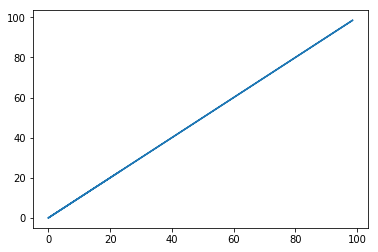

In [18]:
plt.plot(y,y)
plt.show()

In [43]:
print(X[4])

[ 1.          5.          1.          8.          1.          0.
  0.          1.          1.          1.          1.          3.
  4.          5.          1.          0.          0.          0.6
  0.          0.          0.          1.          5.          3.
  1.          0.          0.          3.          0.          0.
  0.667       0.4         0.429       0.375       0.5         3.
  5.          7.          8.          6.          2.          2.
  3.          3.          3.          0.          0.5         0.
  0.5         0.667      10.03333333 19.21666667 19.4        23.9
 19.95        0.          1.          0.          1.          2.
 10.03333333 19.21666667 19.4        23.9        19.95        0.
  1.          0.          0.          1.          1.          3.
  3.          1.          4.         -8.          0.          1.
  9.         -3.          4.          5.          9.          7.
  8.          1.          4.          4.          5.          2.
  0.          2.       

In [40]:
from sklearn.svm import SVR

clf = SVR(C=1000.0, cache_size=500, coef0=1.0, degree=3, epsilon=0.001, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

clf.fit(X[0:600],y[0:600])


[LibSVM]

SVR(C=1000.0, cache_size=500, coef0=1.0, degree=3, epsilon=0.001,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=True)

In [41]:
y_out = clf.predict(X[600:])

In [42]:
y_out

array([39.14638805, 39.14638805, 39.14638805, 39.14639178, 39.14638881,
       39.14638809, 39.14638338, 39.14638858, 39.14638889, 39.14638818,
       39.14638838, 39.14638946, 39.1463893 , 39.14638806, 39.14639219,
       39.14639035, 39.14638968, 39.14622683, 39.14638882, 39.14629759,
       39.14638818, 39.14638805, 39.14638805, 39.14638805, 39.14638805,
       39.14638805, 39.14638806, 39.1463881 , 39.14638811, 39.14638817,
       39.14638809, 39.14638807, 39.14638807, 39.14638822, 39.14638815,
       39.14638823, 39.14638815, 39.14638827, 39.14638818, 39.14639498,
       39.14658063, 39.14638783, 39.14638806, 39.14638806, 39.14638805,
       39.14638805, 39.14638805, 39.1463881 , 39.14638893, 39.14638804,
       39.14638804, 39.14638805, 39.14638805, 39.14638805, 39.14638805,
       39.14638805, 39.14638805, 39.14638805, 39.14638805, 39.14638797,
       39.14638805, 39.14638804, 39.14638805, 39.14638805, 39.14638805,
       39.14638805, 39.14638805, 39.14638805, 39.14638823, 39.14

In [37]:
y[450:]

array([60.5, 35.4, 68.7, 49.8, 41.8, 56.1, 51.4, 17.7, 84.1, 42.7, 59.4,
       61.5, 63.8, 51.9, 51.3, 51. , 53.1, 44.9, 29.1, 68.3, 45.1, 43.6,
       46.4, 44.2, 38.5, 51.5, 45.1, 37.3, 40.7, 46. , 49.5, 21.9, 41.5,
       52.1, 43.3, 35.5, 44.1, 28.5, 40.1, 32.6, 71.4, 52. , 60. , 64.2,
       24.6, 57.9, 74.9, 57.8, 38.8, 49.1, 61.5, 59.3, 59.5, 55. , 68. ,
       32.8, 51.7, 70.9, 45. , 69. , 53.8, 41.6, 35.6, 42.4, 49. , 56. ,
       47.2, 63.4, 68.4, 62.5, 53.6, 45.2, 42.8, 66.3, 41. , 45.9, 72.3,
       41.2, 47.8, 63.9, 45.4, 43.4, 73.9, 62.7, 58.3, 53.5, 55.9, 50.7,
       55.9, 43.9, 66.4, 56.8, 51.1, 55.7, 43.8, 59.4, 46.5, 68.5, 42.9,
       56.1, 50.7, 47.8, 56.3, 64.1, 47.2, 57.7, 60.3, 53.5, 55. , 43.9,
       49. , 52.5, 75.6, 89.7, 53. , 53.6, 33.2, 70.5, 69. , 61.2, 40.1,
       48.9, 69.4, 61.2, 36.7, 60.2, 54.6, 54.2, 90.1, 34. , 28.4, 70.6,
       73.9, 56.7, 52.2, 51.2, 69.4, 43.8, 47. , 55.4, 39.1, 58.9, 53.6,
       51.8, 49.9, 68.5, 48.9, 75.3, 65. , 69.9, 77

<BarContainer object of 82 artists>

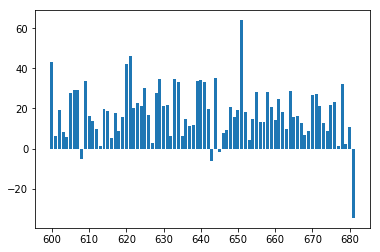

In [39]:
plt.bar([i for i in range(600,len(y))],y[600:]-y_out)